In [1]:
#pip install plotly

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly as py
import plotly.graph_objs as go
import requests
from tensorflow.keras.layers import Input, Dense, LSTM
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from keras.callbacks import *
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
plt.style.use('bmh')

In [3]:
''' 
https://poloniex.com/support/api/ 
https://poloniex.com/public?command=returnChartData&currencyPair=USDT_BTC&start=1414602755&end=9999999999&period=86400 
''' 

' \nhttps://poloniex.com/support/api/ \nhttps://poloniex.com/public?command=returnChartData&currencyPair=USDT_BTC&start=1414602755&end=9999999999&period=86400 \n'

In [52]:
ret = requests.get('https://poloniex.com/public?command=returnChartData&currencyPair=USDT_BTC&start=1414602755&end=9999999999&period=86400')
ret

<Response [200]>

In [53]:
js = ret.json()
js

[{'date': 1424304000,
  'high': 244,
  'low': 225,
  'open': 225,
  'close': 244,
  'volume': 46.27631267,
  'quoteVolume': 0.19311748,
  'weightedAverage': 239.62777823},
 {'date': 1424390400,
  'high': 245,
  'low': 240.25,
  'open': 240.25011809,
  'close': 240.25,
  'volume': 55.894897,
  'quoteVolume': 0.23042935,
  'weightedAverage': 242.56847926},
 {'date': 1424476800,
  'high': 245,
  'low': 245,
  'open': 245,
  'close': 245,
  'volume': 14.72223865,
  'quoteVolume': 0.06009077,
  'weightedAverage': 245},
 {'date': 1424563200,
  'high': 249,
  'low': 235,
  'open': 245,
  'close': 235,
  'volume': 129.12124785,
  'quoteVolume': 0.53905499,
  'weightedAverage': 239.53260845},
 {'date': 1424649600,
  'high': 235.001,
  'low': 235,
  'open': 235.00000236,
  'close': 235,
  'volume': 96.56756248,
  'quoteVolume': 0.41092569,
  'weightedAverage': 235.00006166},
 {'date': 1424736000,
  'high': 239.75,
  'low': 235,
  'open': 235,
  'close': 239.75,
  'volume': 149.15439319,
  'quote

In [54]:
df = pd.DataFrame(js)
df.describe()

,date,high,low,open,close,volume,quoteVolume,weightedAverage
count,1.896000e+03,1896.000000,1896.000000,1896.000000,1896.000000,1.896000e+03,1896.000000,1896.000000
mean,1.506168e+09,4416.772995,4135.952683,4285.596858,4289.416879,1.441423e+07,2745.442615,4276.485906
std,4.730161e+07,4100.335214,3784.636422,3958.420943,3957.995333,2.852916e+07,5034.573108,3938.927080
min,1.424304e+09,219.010000,99.000000,191.300000,178.719313,0.000000e+00,0.000000,207.450144
25%,1.465236e+09,578.785248,558.775000,565.951029,567.546399,1.067740e+05,166.831763,570.864506
50%,1.506168e+09,3678.736151,3531.447981,3602.654999,3607.242660,3.775643e+06,806.575821,3602.468760
75%,1.547100e+09,7601.388889,7237.957864,7396.582244,7406.250000,1.665971e+07,3036.607967,7404.640173
max,1.588032e+09,19903.440214,18569.637853,19223.000000,19223.000000,3.960385e+08,48896.616808,19236.130652


In [55]:
scaler = MinMaxScaler()
df[['close']] = scaler.fit_transform(df[['close']])
df.describe()

,date,high,low,open,close,volume,quoteVolume,weightedAverage
count,1.896000e+03,1896.000000,1896.000000,1896.000000,1896.000000,1.896000e+03,1896.000000,1896.000000
mean,1.506168e+09,4416.772995,4135.952683,4285.596858,0.215849,1.441423e+07,2745.442615,4276.485906
std,4.730161e+07,4100.335214,3784.636422,3958.420943,0.207831,2.852916e+07,5034.573108,3938.927080
min,1.424304e+09,219.010000,99.000000,191.300000,0.000000,0.000000e+00,0.000000,207.450144
25%,1.465236e+09,578.785248,558.775000,565.951029,0.020417,1.067740e+05,166.831763,570.864506
50%,1.506168e+09,3678.736151,3531.447981,3602.654999,0.180029,3.775643e+06,806.575821,3602.468760
75%,1.547100e+09,7601.388889,7237.957864,7396.582244,0.379512,1.665971e+07,3036.607967,7404.640173
max,1.588032e+09,19903.440214,18569.637853,19223.000000,1.000000,3.960385e+08,48896.616808,19236.130652


In [12]:
price = df['close'].values.tolist()
price

[0.0034278368698297933,
 0.0032309273586996947,
 0.0034803460727978203,
 0.0029552540431175573,
 0.0029552540431175573,
 0.003204672757215681,
 0.003099654351279629,
 0.00313903625350565,
 0.003690382884669925,
 0.003217803221637167,
 0.003795401290605977,
 0.004740566944030449,
 0.004647100562222272,
 0.005318168176678739,
 0.004110462809518489,
 0.004267984117318213,
 0.0042679843914162525,
 0.004267985745628597,
 0.004478021209064372,
 0.0058957694093270275,
 0.005108131365331727,
 0.00510813142361694,
 0.005061398178890919,
 0.005060873101038725,
 0.005428857595438652,
 0.005055622161838608,
 0.005055622163413884,
 0.00437772835204648,
 0.0045224602637016775,
 0.004454960511881502,
 0.004435645089785174,
 0.004662687837208973,
 0.004303349663071908,
 0.003350412436521174,
 0.0036103333860821093,
 0.0033504120500534394,
 0.003918939692428852,
 0.00367612641447527,
 0.00363626322497196,
 0.003971453807632816,
 0.0037081588072975617,
 0.003690382884669925,
 0.004005438102478082,
 0.00

In [14]:
'''
RNN layer 
    - Many to One
    - Many to Many
    - One to Many
    - One to One
X(train) -> (sample, 5, 1)
Y(target) -> (sample, 1)
5일 -> 당일(or 내일)
'''
window_size = 5
X = []
Y = []

for i in range(len(price) - window_size):
    # i = 0
    # j = 0, 1, 2, 3, 4 
    ''' 
    price[0, 1, 2, 3, 4 ], price[5]
    price[1, 2, 3, 4, 5 ], price[6]
    price[2, 3, 4, 5, 6 ], price[7]
    ...
    
    '''
    X.append([price[i + j] for j in range(window_size)]) # price[0, 1, 2, 3, 4 ]
    Y.append(price[window_size + i]) # price[5], price[6], ...

In [21]:
X = np.asarray(X)
Y = np.asarray(Y)
print(X.shape)
print(Y.shape)

(1891, 5)
(1891,)


In [23]:
train_test_split = 1500
X_train = X[:train_test_split, :] 
Y_train = Y[:train_test_split] 
X_test = X[train_test_split:, :] 
Y_test = Y[train_test_split:]  

In [24]:
Y_train.shape

(1500,)

In [27]:
X_train.shape[0]

1500

In [29]:
X_train = np.reshape(X_train, (X_train.shape[0], window_size, 1))
X_test = np.reshape(X_test, (X_test.shape[0], window_size, 1))

In [30]:
X_train.shape

(1500, 5, 1)

In [35]:
# Create model
# LSTM -> Dense
i = Input(shape=(5,1))
x = LSTM(128)(i) # with 5 features
x = Dense(1)(x)
model = Model(i, x)
model.compile(loss='mse', optimizer='adam')
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 5, 1)]            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               66560     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.fit(X_train, Y_train, epochs=50, batch_size=1)

Train on 1500 samples
Epoch 1/50
1500/1500 [==============================] - 7s 5ms/sample - loss: 0.0020
Epoch 2/50
1500/1500 [==============================] - 6s 4ms/sample - loss: 8.6773e-04
Epoch 3/50
1500/1500 [==============================] - 6s 4ms/sample - loss: 7.2043e-04
Epoch 4/50
1500/1500 [==============================] - 6s 4ms/sample - loss: 5.6469e-04
Epoch 5/50
1500/1500 [==============================] - 6s 4ms/sample - loss: 5.1522e-04
Epoch 6/50
1500/1500 [==============================] - 6s 4ms/sample - loss: 4.2844e-04
Epoch 7/50
1500/1500 [==============================] - 6s 4ms/sample - loss: 3.6393e-04
Epoch 8/50
1500/1500 [==============================] - 6s 4ms/sample - loss: 3.4727e-04
Epoch 9/50
1500/1500 [==============================] - 6s 4ms/sample - loss: 3.1630e-04
Epoch 10/50
1500/1500 [==============================] - 6s 4ms/sample - loss: 3.2525e-04
Epoch 11/50
1500/1500 [==============================] - 6s 4ms/sample - loss: 3.1646e-04
E

In [37]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

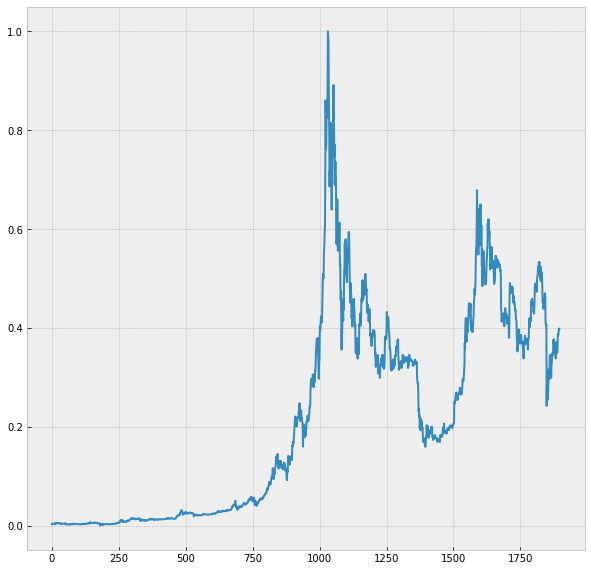

In [38]:
plt.figure(figsize=(10, 10))
plt.plot(price)

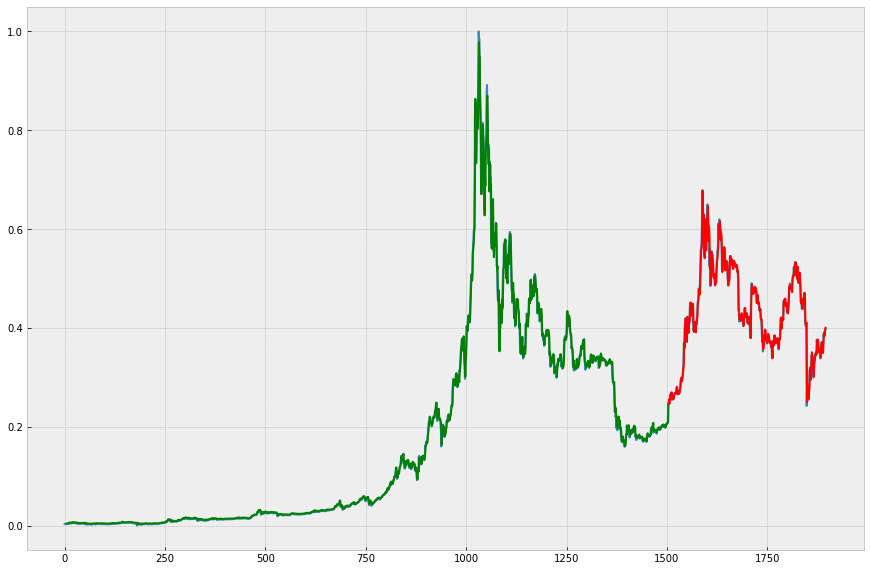

In [39]:
plt.figure(figsize=(15,10))
plt.plot(price)

split_pt = train_test_split + window_size # 1500 + 50

# train graph
plt.plot(np.arange(window_size, split_pt, 1), \
         train_predict, color='g')

# predict graph
plt.plot(np.arange(split_pt, split_pt + len(test_predict), 1), 
         test_predict, color='r')

In [42]:
'''
plt.plot(np.arange(window_size, split_pt, 1), \
         train_predict, color='g')
plt.plot(np.arange(split_pt, split_pt + len(test_predict), 1), 
         test_predict, color='r')
'''
trace1 = go.Scatter(x=np.arange(window_size, split_pt, 1),
                   y=train_predict.reshape(1500), 
                   mode='lines', name='train')
trace2 = go.Scatter(x=np.arange(split_pt, split_pt + len(test_predict), 1),
                   y=test_predict.reshape(391), 
                   mode='lines', name='test')
trace_original = go.Scatter(x=np.arange(1, len(price), 1),
                            y=price,
                            mode='lines', name='original')

data = [trace1, trace2, trace_original]
py.offline.plot(data)

'temp-plot.html'

## prediction

In [43]:
test_predict[390]

array([0.40011987], dtype=float32)

In [45]:
print("X_test[390]:",X_test[390] )
print("test_predict[390]:",test_predict[390] )

X_test[390]: [[0.38722078]
 [0.38458676]
 [0.38646754]
 [0.39465429]
 [0.39878227]]
test_predict[390]: [0.40011987]


In [47]:
test_predict

array([[0.254947  ],
       [0.24576062],
       [0.2511016 ],
       [0.25797543],
       [0.26368085],
       [0.26724467],
       [0.2626688 ],
       [0.26952133],
       [0.25758582],
       [0.25579032],
       [0.25843352],
       [0.26245946],
       [0.2570998 ],
       [0.26301485],
       [0.266347  ],
       [0.26827413],
       [0.26810333],
       [0.26962942],
       [0.26842254],
       [0.27351445],
       [0.2811075 ],
       [0.27670845],
       [0.2657829 ],
       [0.27008832],
       [0.27209345],
       [0.27159813],
       [0.26755482],
       [0.2712039 ],
       [0.27614316],
       [0.28119648],
       [0.29467636],
       [0.29937035],
       [0.29423192],
       [0.2921302 ],
       [0.29887116],
       [0.30702674],
       [0.31640142],
       [0.3268045 ],
       [0.36989322],
       [0.3602551 ],
       [0.39637068],
       [0.4129104 ],
       [0.4183007 ],
       [0.4017377 ],
       [0.3749779 ],
       [0.37144163],
       [0.42292392],
       [0.412

In [49]:
_temp = scaler.inverse_transform(test_predict)

In [51]:
import tensorflow as tf
tf.__version__

'2.1.0'